In [1]:
from datasets import get_german, prep_data
from evaluate import my_accuracy_score
from utils_across import get_original_model, get_modified_model
import tensorflow as tf
import numpy as np
from experiments import plot_ranking_histogram

< original model >
>>> average accuracy : 0.8143


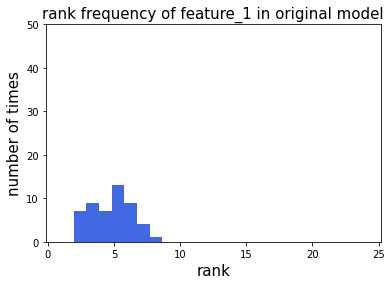

In [2]:
%matplotlib inline
plot_ranking_histogram(get_german, 1, epochs=50, text_index=6)

< original model >
>>> average accuracy : 0.8107999999999999


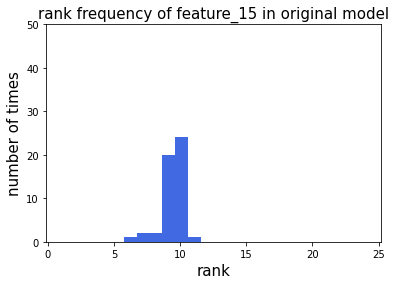

In [3]:
%matplotlib inline
plot_ranking_histogram(get_german, 15, epochs=50, text_index=6)

< modified model >
min_loss : tf.Tensor(3335.2012, shape=(), dtype=float32)
min_loss : tf.Tensor(383.05084, shape=(), dtype=float32)
min_loss : tf.Tensor(346.14804, shape=(), dtype=float32)
min_loss : tf.Tensor(3133.015, shape=(), dtype=float32)
min_loss : tf.Tensor(349.68723, shape=(), dtype=float32)
min_loss : tf.Tensor(385.9521, shape=(), dtype=float32)
min_loss : tf.Tensor(3884.461, shape=(), dtype=float32)
min_loss : tf.Tensor(353.4625, shape=(), dtype=float32)
min_loss : tf.Tensor(366.68243, shape=(), dtype=float32)
min_loss : tf.Tensor(3283.2024, shape=(), dtype=float32)
min_loss : tf.Tensor(368.61624, shape=(), dtype=float32)
min_loss : tf.Tensor(3433.3381, shape=(), dtype=float32)
min_loss : tf.Tensor(384.87088, shape=(), dtype=float32)
min_loss : tf.Tensor(3132.0105, shape=(), dtype=float32)
min_loss : tf.Tensor(3065.1965, shape=(), dtype=float32)
min_loss : tf.Tensor(3459.6301, shape=(), dtype=float32)
min_loss : tf.Tensor(3233.9631, shape=(), dtype=float32)
min_loss : tf.Te

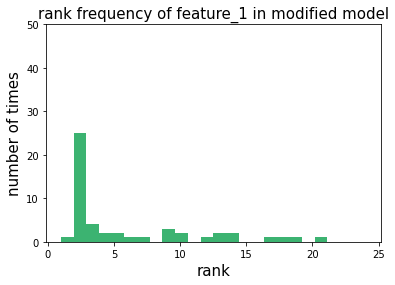

In [2]:
%matplotlib inline
targets = [[1, 1], [15, -1]]
plot_ranking_histogram(get_german, 1, targets=targets, epochs=50, text_index=6)

< modified model >
min_loss : tf.Tensor(3136.3098, shape=(), dtype=float32)
min_loss : tf.Tensor(301.8864, shape=(), dtype=float32)
min_loss : tf.Tensor(3189.762, shape=(), dtype=float32)
min_loss : tf.Tensor(328.31454, shape=(), dtype=float32)
min_loss : tf.Tensor(358.75763, shape=(), dtype=float32)
min_loss : tf.Tensor(342.7907, shape=(), dtype=float32)
min_loss : tf.Tensor(3257.6533, shape=(), dtype=float32)
min_loss : tf.Tensor(6980.091, shape=(), dtype=float32)
min_loss : tf.Tensor(3330.6218, shape=(), dtype=float32)
min_loss : tf.Tensor(7193.1055, shape=(), dtype=float32)
min_loss : tf.Tensor(3169.8298, shape=(), dtype=float32)
min_loss : tf.Tensor(368.51468, shape=(), dtype=float32)
min_loss : tf.Tensor(354.37643, shape=(), dtype=float32)
min_loss : tf.Tensor(3010.8494, shape=(), dtype=float32)
min_loss : tf.Tensor(362.3504, shape=(), dtype=float32)
min_loss : tf.Tensor(352.992, shape=(), dtype=float32)
min_loss : tf.Tensor(351.28467, shape=(), dtype=float32)
min_loss : tf.Tenso

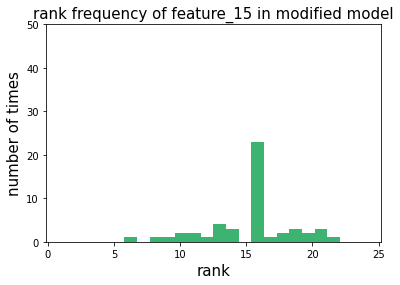

In [3]:
%matplotlib inline
plot_ranking_histogram(get_german, 15, targets=targets, epochs=50, text_index=6)